# **Import Libraries**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import io
import seaborn as sns

# **Import csv**

In [4]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

Saving Iris.csv to Iris (1).csv


# **Performing Functions**

In [12]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.shape

(150, 5)

In [15]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


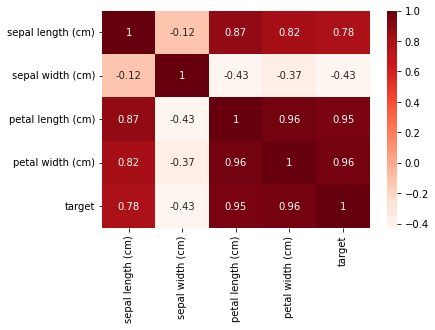

In [19]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)

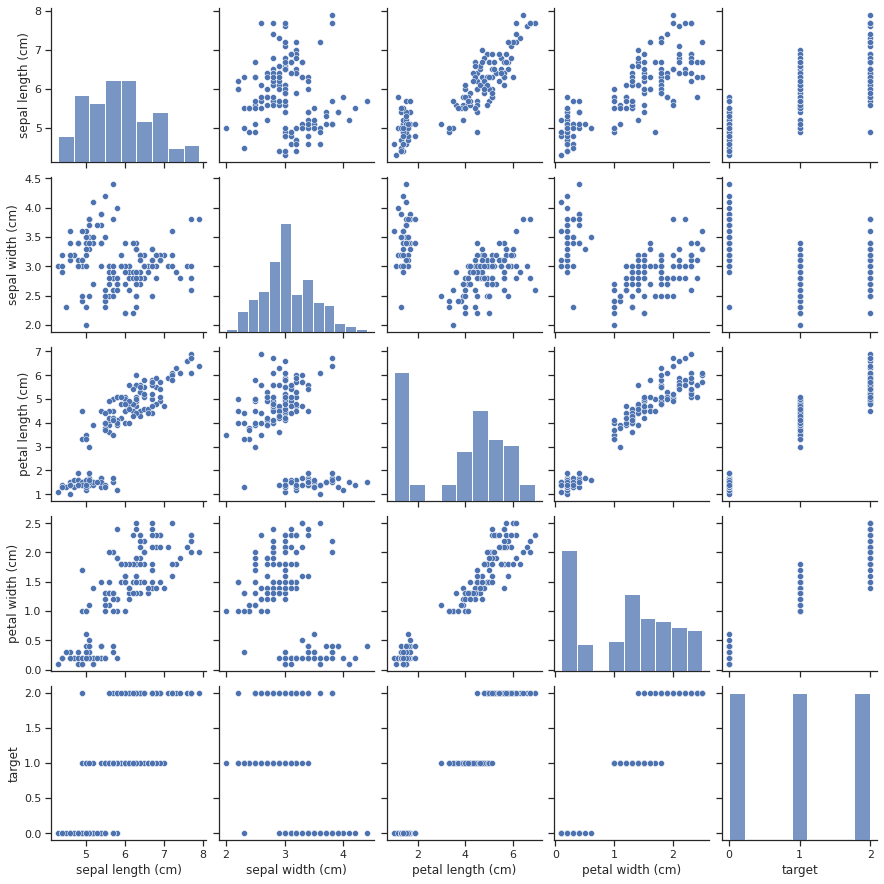

In [21]:
sns.set(style="ticks", color_codes=True)
p = sns.pairplot(df)

# **Making Decision Tree**

In [32]:
fc = [x for x in df.columns if x!="target"]
x= df[fc]
y= df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state = 100, test_size = 0.30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [34]:
model= DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
Y_pred = model.predict(X_test)

In [36]:
data = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
data.head()

,Actual,Predicted
128,2,2
11,0,0
118,2,2
15,0,0
123,2,2


# **Testing Accuracy**

In [37]:
accuracy_score(Y_test,Y_pred)

0.9555555555555556

# **Plotting Tree**

[Text(133.92000000000002, 195.696, 'Petal width <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]\nclass = Versicolor'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(167.40000000000003, 152.208, 'Petal width <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]\nclass = Versicolor'),
 Text(66.96000000000001, 108.72, 'Petal length <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = Versicolor'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Versicolor'),
 Text(100.44000000000001, 65.232, 'Sepal length <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(267.84000000000003, 108.72, 'Petal length <= 4.85\ngini = 0.064\nsamples = 30\nvalue 

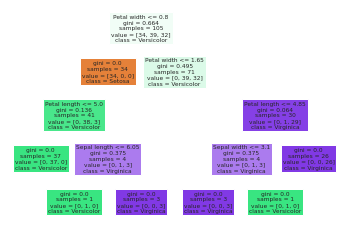

In [39]:
f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plot_tree(model,feature_names = f_n, class_names = c_n , filled = True)

In [40]:
final_model= DecisionTreeClassifier().fit(x,y)

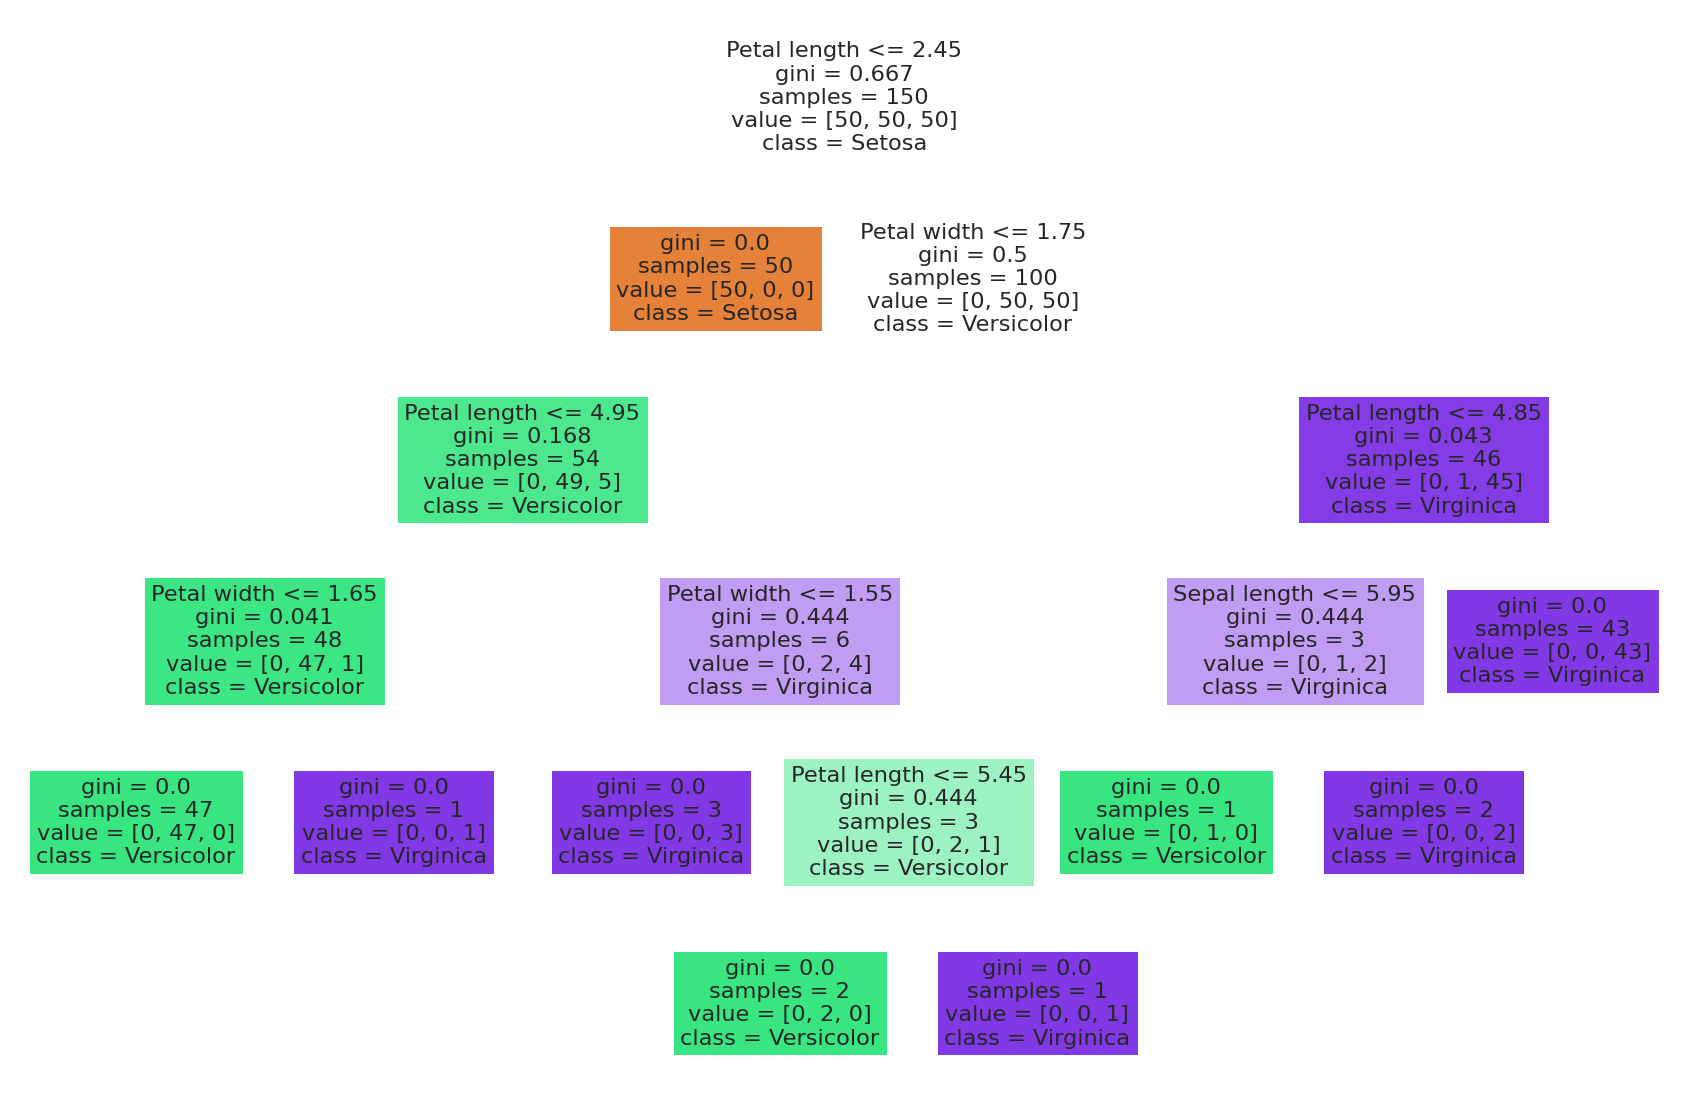

In [41]:
plt.figure(figsize = (30,20))
tree = tree.plot_tree(final_model, feature_names = f_n, class_names = c_n, filled = True)